In [45]:
from pocket_planet_utils import *
from ipywidgets import interact

ModuleNotFoundError: No module named 'ipywidgets'

In [12]:
def generate_gradient(n):
    grad = np.random.normal(size=n)
    norm = np.linalg.norm(grad)
    gradient = grad / norm
    return gradient
def generate_corner_gradients(l):
    corners = np.array([generate_gradient(2) for _ in range((l+1) * (l+1))])
    corners = corners.reshape(l+1, l+1, 2)
    return corners

In [13]:
def compute_dot_products(gradients, x, y):
    floor_x, floor_y = int(x), int(y)
    ceil_x, ceil_y = floor_x + 1, floor_y + 1
    corner_coords = np.array([[[floor_x, floor_y], [ceil_x, floor_y]],
                              [[floor_x, ceil_y], [ceil_x, ceil_y]]])
    corner_gradients = gradients[floor_y: ceil_y+1, floor_x: ceil_x+1]
    delta = np.array([x, y]) - corner_coords
    return np.sum(corner_gradients * delta, axis=2)

In [60]:
# Instead of linear interpolation, fade function lets there be a smooth interpolation with easy curve
def fade(t, a, b):
    smooth_t = 6*t**5 - 15*t**4 + 10*t**3
    return (1 - smooth_t) * a + smooth_t * b
def fade_optimized(t, a, b):
    smooth_t = ((6*t - 15)*t + 10)*t**3
    return (1 - smooth_t) * a + smooth_t * b
def interpolate(dots, x, y):
    dx = x - np.floor(x)
    dy = y - np.floor(y)
    interp1 = fade_optimized(dx, dots[0, 0], dots[0, 1])
    interp2 = fade_optimized(dx, dots[1, 0], dots[1, 1])
    interp = fade_optimized(dy, interp1, interp2)
    return interp

In [61]:
def generate_world(size=100, l=4):
    grad = generate_corner_gradients(2 ** l + 1)
    units = np.linspace(0, 1, size)
    rescale_factor = (2 ** 0.5)
    grid = np.zeros((size, size))
    for i, x in enumerate(units):
        for j, y in enumerate(units):
            for log_f in range(l):
                f = 2 ** log_f
                amp = 1 / f
                new_x = x * f
                new_y = y * f
                dots = compute_dot_products(grad, new_x, new_y)
                val = interpolate(dots, new_x, new_y)
                rescaled_val = val * rescale_factor
                grid[j][i] += rescaled_val * amp
    grid /= 2 - 2 ** (1 - l)        
    return grid

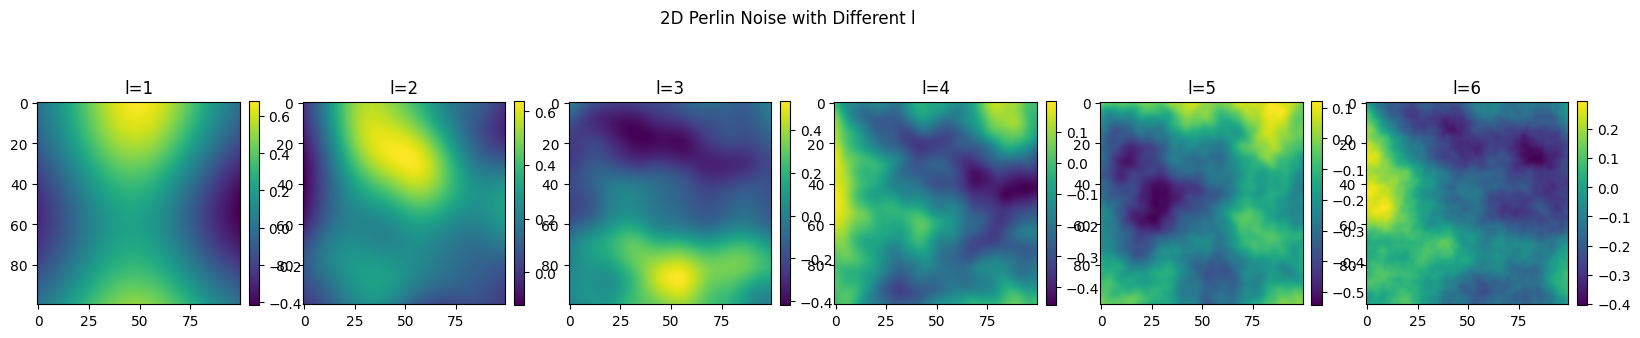

In [64]:
fig, ax = plt.subplots(1, 6, figsize=(20, 4))
test_worlds = []
fig.suptitle('2D Perlin Noise with Different l')
for l in range(6):
    world = generate_world(l=l+1)
    test_worlds.append(world)
    ax[l].set_title(f'l={l+1}')
    im = ax[l].imshow(world)
    fig.colorbar(im, ax=ax[l], fraction=0.046, pad=0.04)

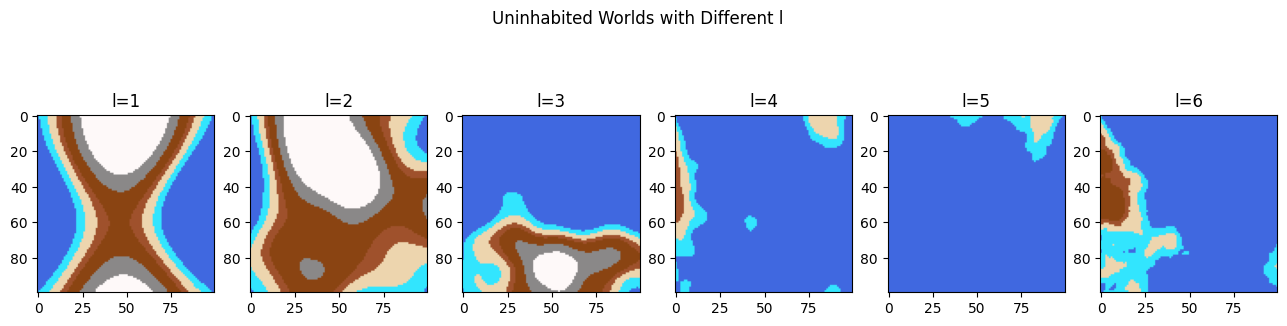

In [65]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))
fig.suptitle('Uninhabited Worlds with Different l')
for l in range(6):
    uninhabited_world = get_uninhabited_world(test_worlds[l])
    ax[l].set_title(f'l={l+1}')
    im = ax[l].imshow(uninhabited_world)

In [20]:
grid = generate_world()

@interact(ocean=h_o,shallows=h,beach=h,dirt=h,inland=h,mountain=h)
def toggle_ground_heights(ocean=0.01,
                          shallows=0.075,
                          beach=0.15,
                          dirt=0.2,
                          inland=0.3,
                          mountain=0.4,):
    heights = np.array([ocean, shallows, beach, dirt, inland, mountain, 1])
    visualize_height_values(heights, grid)

NameError: name 'interact' is not defined

In [ ]:
# add in Fractal brownian motion (FBM)


Resources: https://rtouti.github.io/graphics/perlin-noise-algorithm